<a href="https://colab.research.google.com/github/themathedges/3YP-Standalone-Kennington/blob/main/Ravi/Generation_models/Model_2_Univariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Model 2: Univariate Regression

**Author:** Ravi Kohli

**Date:** December 20th, 2020

**College:** Christ Church

**Goal:**
- To conduct a univariate regression model to forecast future generation

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import pickle

In [ ]:
# unpickle the precipitation monthly/ annual dataframe
path = '/content/drive/My Drive/3YP/data/'
filename = 'precipitation_data_processed'
infile = open(path+filename, 'rb')
precipitation_monthly_df = pickle.load(infile)
infile.close()

In [ ]:
precip_overlay_part1 = precipitation_monthly_df.iloc[250][12:13]          # getting the December 2018 data
precip_overlay_part2 = precipitation_monthly_df.iloc[251][1:11]           # getting the 2019 data
model_2_precip = pd.concat([precip_overlay_part1, precip_overlay_part2])  # combining the precipitation data to form montly data

In [ ]:
model_2_precip

Dec     76.1
Jan     58.6
Feb     24.1
Mar     83.4
Apr     52.8
May     86.2
June     2.5
July    23.2
Aug     43.2
Sept    30.3
Oct     50.1
dtype: object

In [ ]:
# the generations (kWh) array
monthly_sandford_generation = np.array([181051, 190126, 204585, 207951, 154112, 49882, 75884, 11172, 22088, 18483, 96626]) # data is in kWh

In [ ]:
# now we conduct a linear regression analysis
from sklearn.linear_model import LinearRegression

# get the feature vector x and the target vector y
uni_var_x = np.array(model_2_precip.values).reshape((-1, 1))
uni_var_y = np.array(monthly_sandford_generation)

In [ ]:
univar_model_2 = LinearRegression()
univar_model_2.fit(uni_var_x, uni_var_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model2_r_sq = univar_model_2.score(uni_var_x, uni_var_y)
print('coefficient of determination:', model2_r_sq)

coefficient of determination: 0.14036956205816553


In [ ]:
print(univar_model_2.intercept_, univar_model_2.coef_)

56948.163955594035 [1103.73269838]


In [ ]:
# use the monthly precipitation data
x_uni_var_model_2_target = np.array([88.276, 67.976, 27.956, 83.4, 52.8, 86.2, 2, 18.56, 34.56, 30.3, 50.1]).reshape((-1, 1))
model_2_predict = univar_model_2.predict(x_uni_var_model_2_target)
print(model_2_predict, sum(model_2_predict))

[154381.27163743 131975.4978604   87804.11527139 148999.47100015
 115225.25042985 152089.9225556   59155.62935235  77433.44283745
  95093.16601147  90391.26471639 112245.17214423] 1224794.2038167163


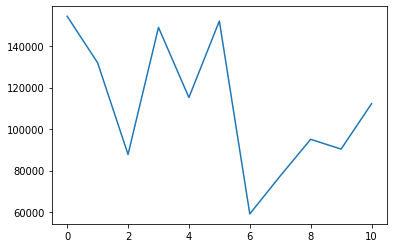

In [ ]:
plt.plot(model_2_predict)

In [ ]:
((model_2_predict - monthly_sandford_generation) / monthly_sandford_generation) * 100

array([-14.73050597, -30.5852446 , -57.08184116, -28.34875956,
       -25.23278497, 204.89940771, -22.04466112, 593.10278229,
       330.51958535, 389.05082896,  16.16456455])

In [ ]:
sum(monthly_sandford_generation)

1211960